### Pyber Data Analysis
* There is an increase in drivers against the city types where rural areas have the least and urban areas have the most. 

* The higher the fare, the less likely there are customers willing to ride. Looking at the total drivers in each city type could explain the reason for the lower average price available in urban areas. If there are more drivers available, the price could be more reasonable.

* Despite most of the fare being made up in urban areas, rural areas have the most expensive fares. It would be interesting to see population in rural areas in comparison to urban areas. 

In [58]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cities = pd.read_csv(city_data_to_load)
rides = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = rides.merge(cities, on ="city", how="left")

# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

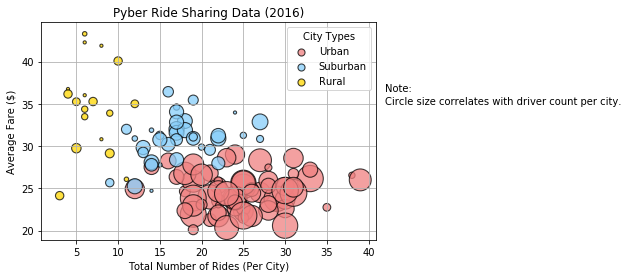

In [119]:
# Obtain the x and y coordinates for each of the three city types
total_rides = merged_data.groupby("city")["ride_id"].count()
average_fare = merged_data.groupby("city")["fare"].mean()
num_drivers = merged_data.groupby("city")["driver_count"].mean()
city_types = cities.set_index("city")["type"]


# cities_df["Total Rides"] = total_rides
# cities_df["Average Fare"] = average_fare
# cities_df["Driver Count"] = num_drivers
# cities_df["City Type"] = city_types

cities_df = pd.DataFrame({"Total Rides":total_rides,
                         "Average Fare": average_fare,
                         "Driver Count": num_drivers,
                         "City Type": city_types})
# Each city type
urban = cities_df[cities_df["City Type"] == "Urban"]
suburban = cities_df[cities_df["City Type"] == "Suburban"]
rural = cities_df[cities_df["City Type"] == "Rural"]


# Build the scatter plots for each city types
plt.scatter(urban["Total Rides"], urban["Average Fare"], s= urban["Driver Count"]*10, color = "lightcoral", label="Urban", alpha=0.75, edgecolor="black", linewidths=1.1)
plt.scatter(suburban["Total Rides"], suburban["Average Fare"], s= suburban["Driver Count"]*10, color = "lightskyblue", label="Suburban", alpha=0.75, edgecolor="black", linewidths=1.1)
plt.scatter(rural["Total Rides"], rural["Average Fare"], s= rural["Driver Count"]*10, color = "gold", label="Rural",alpha=0.75,edgecolor="black", linewidths=1.1)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
legend = plt.legend(title="City Types")
# Change the point sizes in the legend
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42,36.5,"Note: ")
plt.text(42,35,"Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("images/pyber_ride.png")
plt.show()

## Total Fares by City Type

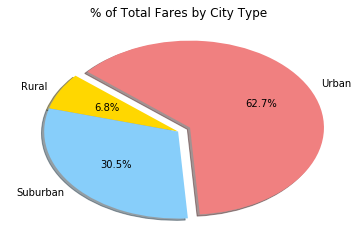

In [86]:
# Calculate Type Percents
types = merged_data.groupby("type")["type", "fare","ride_id","driver_count"]

total_fares = types.sum()
fares = total_fares["fare"]

# Build Pie Chart
label = fares.index
explode = [0,0,.1]
plt.pie(fares, explode = explode, colors=["gold","lightskyblue","lightcoral"],
        labels = label, startangle = 140,  autopct = "%1.1f%%", shadow = True)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/total_fares.png")
plt.show()


## Total Rides by City Type

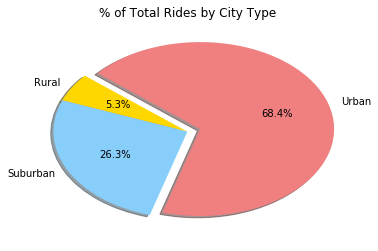

In [90]:
# Calculate Ride Percents
total_rides = types.count()
rides = total_rides["ride_id"]

# Build Pie Chart
label = rides.index
explode = [0,0,.1]
plt.pie(rides, explode = explode, colors=["gold","lightskyblue","lightcoral"],
        labels = label, startangle = 140,  autopct = "%1.1f%%", shadow = True)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/total_rides.png")
plt.show()

## Total Drivers by City Type

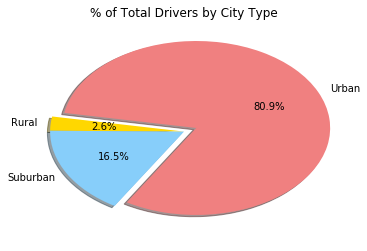

In [104]:
# Calculate Driver Percents
drop_types = merged_data.drop_duplicates(subset="city")
types = drop_types.groupby("type")["type", "fare","ride_id","driver_count"]
total_drivers = types.sum()
drivers = total_drivers["driver_count"]

# Build Pie Charts
label = drivers.index
explode = [0,0,.1]
plt.pie(drivers, explode = explode, colors=["gold","lightskyblue","lightcoral"],
        labels = label, startangle = 170,  autopct = "%1.1f%%", shadow = True)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/total_drivers.png")
plt.show()

